# Introduction
This project explores the `2020 Kaggle Machine Learning (ML) & Data Science (DS) Survey` dataset to understand the nature of women's representation in Machine Learning (ML) and Data Science (DS). It also gives an insight on how different levels of formal education affects annual income.

### QUESTION 1:  EXPLORATORY DATA ANALYSIS

In [1]:
%%capture
!pip install pingouin

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from pingouin import welch_anova
%matplotlib inline
plt.rcParams.update({'font.size': 12})

In [3]:
pd.options.display.max_columns = 500

In [4]:
dataset = pd.read_csv('clean_kaggle_data.csv', low_memory=False)
dataset.head()

,Unnamed: 0,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,Q10_Part_8,Q10_Part_9,Q10_Part_10,Q10_Part_11,Q10_Part_12,Q10_Part_13,Q10_OTHER,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_OTHER,Q13,Q14_Part_1,Q14_Part_2,Q14_Part_3,Q14_Part_4,Q14_Part_5,Q14_Part_6,Q14_Part_7,Q14_Part_8,Q14_Part_9,Q14_Part_10,Q14_Part_11,Q14_OTHER,Q15,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q16_Part_13,Q16_Part_14,Q16_Part_15,Q16_OTHER,Q17_Part_1,Q17_Part_2,Q17_Part_3,Q17_Part_4,Q17_Part_5,Q17_Part_6,Q17_Part_7,Q17_Part_8,Q17_Part_9,Q17_Part_10,Q17_Part_11,Q17_OTHER,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_OTHER,Q19_Part_1,Q19_Part_2,Q19_Part_3,Q19_Part_4,Q19_Part_5,Q19_OTHER,Q20,Q21,Q22,Q23_Part_1,Q23_Part_2,Q23_Part_3,Q23_Part_4,Q23_Part_5,Q23_Part_6,Q23_Part_7,Q23_OTHER,Q24,Q25,Q26_A_Part_1,Q26_A_Part_2,Q26_A_Part_3,Q26_A_Part_4,Q26_A_Part_5,Q26_A_Part_6,Q26_A_Part_7,Q26_A_Part_8,Q26_A_Part_9,Q26_A_Part_10,Q26_A_Part_11,Q26_A_OTHER,Q27_A_Part_1,Q27_A_Part_2,Q27_A_Part_3,Q27_A_Part_4,Q27_A_Part_5,Q27_A_Part_6,Q27_A_Part_7,Q27_A_Part_8,Q27_A_Part_9,Q27_A_Part_10,Q27_A_Part_11,Q27_A_OTHER,Q28_A_Part_1,Q28_A_Part_2,Q28_A_Part_3,Q28_A_Part_4,Q28_A_Part_5,Q28_A_Part_6,Q28_A_Part_7,Q28_A_Part_8,Q28_A_Part_9,Q28_A_Part_10,Q28_A_OTHER,Q29_A_Part_1,Q29_A_Part_2,Q29_A_Part_3,Q29_A_Part_4,Q29_A_Part_5,Q29_A_Part_6,Q29_A_Part_7,Q29_A_Part_8,Q29_A_Part_9,Q29_A_Part_10,Q29_A_Part_11,Q29_A_Part_12,Q29_A_Part_13,Q29_A_Part_14,Q29_A_Part_15,Q29_A_Part_16,Q29_A_Part_17,Q29_A_OTHER,Q30,Q31_A_Part_1,Q31_A_Part_2,Q31_A_Part_3,Q31_A_Part_4,Q31_A_Part_5,Q31_A_Part_6,Q31_A_Part_7,Q31_A_Part_8,Q31_A_Part_9,Q31_A_Part_10,Q31_A_Part_11,Q31_A_Part_12,Q31_A_Part_13,Q31_A_Part_14,Q31_A_OTHER,Q32,Q33_A_Part_1,Q33_A_Part_2,Q33_A_Part_3,Q33_A_Part_4,Q33_A_Part_5,Q33_A_Part_6,Q33_A_Part_7,Q33_A_OTHER,Q34_A_Part_1,Q34_A_Part_2,Q34_A_Part_3,Q34_A_Part_4,Q34_A_Part_5,Q34_A_Part_6,Q34_A_Part_7,Q34_A_Part_8,Q34_A_Part_9,Q34_A_Part_10,Q34_A_Part_11,Q34_A_OTHER,Q35_A_Part_1,Q35_A_Part_2,Q35_A_Part_3,Q35_A_Part_4,Q35_A_Part_5,Q35_A_Part_6,Q35_A_Part_7,Q35_A_Part_8,Q35_A_Part_9,Q35_A_Part_10,Q35_A_OTHER,Q36_Part_1,Q36_Part_2,Q36_Part_3,Q36_Part_4,Q36_Part_5,Q36_Part_6,Q36_Part_7,Q36_Part_8,Q36_Part_9,Q36_OTHER,Q37_Part_1,Q37_Part_2,Q37_Part_3,Q37_Part_4,Q37_Part_5,Q37_Part_6,Q37_Part_7,Q37_Part_8,Q37_Part_9,Q37_Part_10,Q37_Part_11,Q37_OTHER,Q38,Q39_Part_1,Q39_Part_2,Q39_Part_3,Q39_Part_4,Q39_Part_5,Q39_Part_6,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_Part_10,Q39_Part_11,Q39_OTHER,Q26_B_Part_1,Q26_B_Part_2,Q26_B_Part_3,Q26_B_Part_4,Q26_B_Part_5,Q26_B_Part_6,Q26_B_Part_7,Q26_B_Part_8,Q26_B_Part_9,Q26_B_Part_10,Q26_B_Part_11,Q26_B_OTHER,Q27_B_Part_1,Q27_B_Part_2,Q27_B_Part_3,Q27_B_Part_4,Q27_B_Part_5,Q27_B_Part_6,Q27_B_Part_7,Q27_B_Part_8,Q27_B_Part_9,Q27_B_Part_10,Q27_B_Part_11,Q27_B_OTHER,Q28_B_Part_1,Q28_B_Part_2,Q28_B_Part_3,Q28_B_Part_4,Q28_B_Part_5,Q28_B_Part_6,Q28_B_Part_7,Q28_B_Part_8,Q28_B_Part_9,Q28_B_Part_10,Q28_B_OTHER,Q29_B_Part_1,Q29_B_Part_2,Q29_B_Part_3,Q29_B_Part_4,Q29_B_Part_5,Q29_B_Part_6,Q29_B_Part_7,Q29_B_Part_8,Q29_B_Part_9,Q29_B_Part_10,Q29_B_Part_11,Q29_B_Part_12,Q29_B_Part_13,Q29_B_Part_14,Q29_B_Part_15,Q29_B_Part_16,Q29_B_Part_17,Q29_B_OTHER,Q31_B_Part_1,Q31_B_Part_2,Q31_B_Part_3,Q31_B_Part_4,Q31_B_Part_5,Q31_B_Part_6,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_Part_10,Q31_B_Part_11,Q31_B_Part_12,Q31_B_Part_13,Q31_B_Part_14,Q31_B_OTHER,Q33_B_Part_1,Q33_B_Part_2,Q33_B_Part_3,Q33_B_Part_4,Q33_B_Part_5,Q33_B_Part_6,Q33_B_Part_7,Q33_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_

In [4]:
missing_values = pd.isna(dataset).sum()

# removing columns that have more than 100 missing values
columns_needed = missing_values[missing_values < 100].index
cleaned_dataset = dataset[columns_needed].copy()

# dropping other columns that are not relevant to our analysis
cleaned_dataset.drop(columns=['Unnamed: 0', 'Time from Start to Finish (seconds)', 'Q20', 'Q21', 'Q22'], inplace=True)

# renaming the dataset columns
# creating a dictionary for the column names
new_column_names = {'Q1':'age_in_years', 'Q2':'gender', 'Q3':'country',
                    'Q4':'formal_edu', 'Q5':'job_title', 'Q6':'yrs_programming_exp', 'Q24':'salary'}

cleaned_dataset.rename(columns=new_column_names, inplace=True)

# replacing the 'Man' and 'Woman' values in 'gender' column with 'male' and 'female' respectively
cleaned_dataset['gender'].replace({'Man':'male', 'Woman':'female'}, inplace=True)

# replacing some values in the 'formal_education_level' column
cleaned_dataset['formal_edu'].replace({'Some college/university study without earning a bachelor’s degree':'study_w/o_deg',
                                       'No formal education past high school':'high_school', 'Master’s degree':'masters',
                                       'Bachelor’s degree':'bachelors', 'Doctoral degree':'doctoral', 'Professional degree':'professional'}, inplace=True)

# changing 'I have never written code' value in 'yrs_programming_exp' column to '0 years'
cleaned_dataset['yrs_programming_exp'].replace({'I have never written code':'0 years'}, inplace=True)

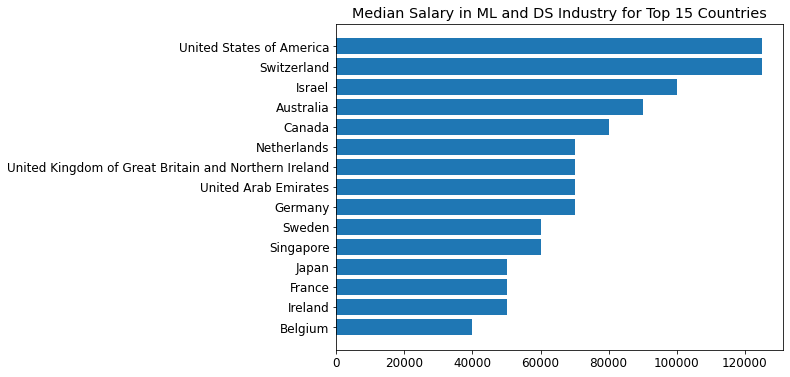

In [5]:
# generating table for median salary for top 15 countries
country_median_salary = cleaned_dataset.groupby('country').median()
country_median_salary = country_median_salary.sort_values('salary').tail(15)

# visualizing for the top 15 countries
plt.figure(figsize=(8,6))
plt.barh(country_median_salary.index, country_median_salary['salary'])
plt.title('Median Salary in ML and DS Industry for Top 15 Countries')
plt.savefig('1-Median Salary in ML and DS Industry for Top 15 Countries.', dpi=300, bbox_inches='tight')
plt.show()

In [6]:
# gender and formal education stacked vertical bar chart
gender_formal_education = cleaned_dataset.groupby('gender')
gender_formal_education = gender_formal_education['formal_edu'].value_counts().loc[['female', 'male']]
gender_formal_education = gender_formal_education.unstack(level=1).drop(columns=['I prefer not to answer', 'high_school'])
gender_formal_education = round(gender_formal_education.div(gender_formal_education.sum(axis=1), axis=0) * 100, 1)

# percentage of formal education in ML and DS industry by gender
gender_formal_education

formal_edu,bachelors,doctoral,masters,professional,study_w/o_deg
gender,,,,,
female,27.2,18.4,47.5,4.6,2.2
male,29.1,15.9,46.5,4.5,3.9


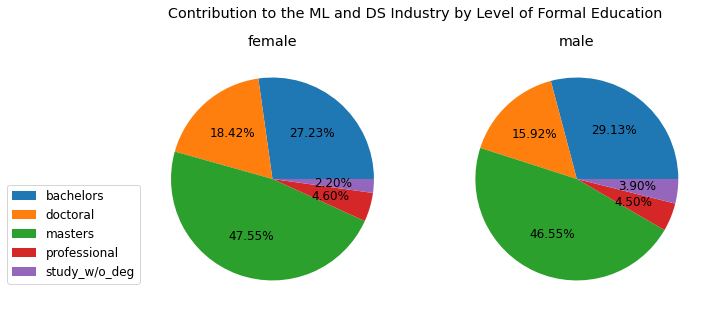

In [7]:
gnd_frml_edu = gender_formal_education.T
fig, axes = plt.subplots(1,2, figsize=(10,5))
fig.suptitle('Contribution to the ML and DS Industry by Level of Formal Education')
for ax, col in zip(axes, gnd_frml_edu.columns):
    gnd_frml_edu[col].plot(kind='pie', legend=False, ax=ax, autopct='%0.2f%%', title=col, labels=None)
    ax.set(ylabel='', aspect='equal')
axes[0].legend(bbox_to_anchor=(0, 0.5), labels=gnd_frml_edu.index)
plt.savefig('1-Contribution to the ML and DS Industry by Level of Formal Education', dpi=300, bbox_inches='tight')
plt.show()

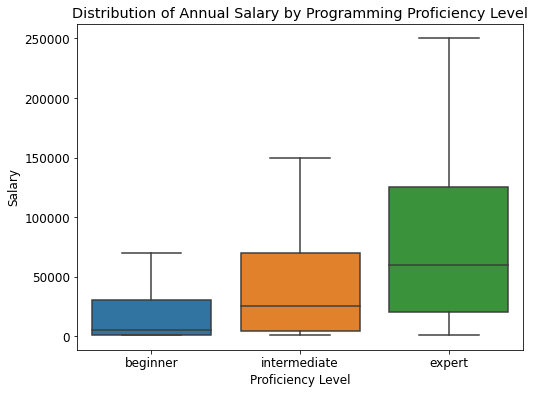

In [8]:
# categorizing the programming proficiency level into 'beginner', 'intermediate', and 'expert'

# function to categorize the values
def categorize_experience(element):
    if (element == '20+ years') or (element == '10-20 years'):
        return 'expert'
    elif (element == '5-10 years') or (element == '3-5 years'):
        return 'intermediate'
    else:
        return 'beginner'
        
prog_exp = cleaned_dataset[['yrs_programming_exp', 'salary']].copy()
prog_exp['programming_exp'] = prog_exp['yrs_programming_exp'].apply(categorize_experience)

# visualizing the distribution of salary for different programming experience
plt.figure(figsize=(8, 6))
sns.boxplot(x='programming_exp', y='salary', data=prog_exp, showfliers=False,
            order=['beginner', 'intermediate', 'expert'])
plt.xlabel('Proficiency Level', fontsize='12')
plt.ylabel('Salary', fontsize='12')
plt.title('Distribution of Annual Salary by Programming Proficiency Level')
plt.savefig('1-Distribution of Annual Salary by Programming Proficiency Level', dpi=300, bbox_inches='tight')
plt.show()

### QUESTION 2: TWO-SAMPLE T-TEST

#####  CREATING A BOOTSTRAP FUNCTION

In [9]:
# function to bootstrap
def my_bootstrap(data, boot_freq):
    """
    Randomly selects sample from original sample with 
    replacement with size relative to the original sample. 
    'data' argument is the original sample and 'boot_freq' 
    is the number of replication for the bootstrapping. 
    """
    list_means = list()
    for i in range(boot_freq):
        boot_samples = data.sample(frac=1, replace=True)
        boot_means = boot_samples.mean()
        list_means.append(boot_means)
    return pd.Series(list_means)

Estimating the difference between average salary of male and female in the Male and Female in Machine Learning(ML) and Data Science(DS) Industry.

In [10]:
# separating the dataset to female and male
male_dataset = cleaned_dataset[cleaned_dataset['gender'] == 'male']['salary']
female_dataset = cleaned_dataset[cleaned_dataset['gender'] == 'female']['salary']

# calculating average salary for both gender
male_average_salary = round(male_dataset.mean(), 2)
female_average_salary = round(female_dataset.mean(), 2)

# count of each gender in the ML and DS industry
male_count = male_dataset.count()
female_count = female_dataset.count()

total_count = male_count + female_count

print('Average salary for men:', male_average_salary, '\nAverage salary for women:', female_average_salary)
print('Number of male participant: ', round((male_count/total_count * 100), 2), '%',
      '\nNumber of female participant: ', round(female_count/total_count * 100, 2),'%', sep='')

Average salary for men: 50750.62 
Average salary for women: 36417.11
Number of male participant: 84.05%
Number of female participant: 15.95%


The average salary of men is 1.4 times larger than that of women. It is apparent that women are under-represented in Machine Learning and Data Science fields as 16% of them participated in the survey.

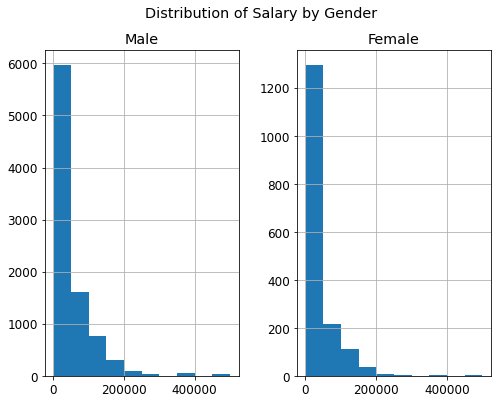

In [11]:
# visualizing the normality of the distribution for the two gender groups
hist_gender = pd.DataFrame({'Male':male_dataset, 'Female':female_dataset})
hist_gender.hist(figsize=(8,6))
plt.suptitle('Distribution of Salary by Gender')
plt.savefig('2-Distribution of Salary by Gender', dpi=300, bbox_inches='tight')
plt.show()

The distributions of salary for both genders are positively skewed. Since these distributions fail to meet the assumption of Normality for a Two-Sample T-test, the test cannot be computed.

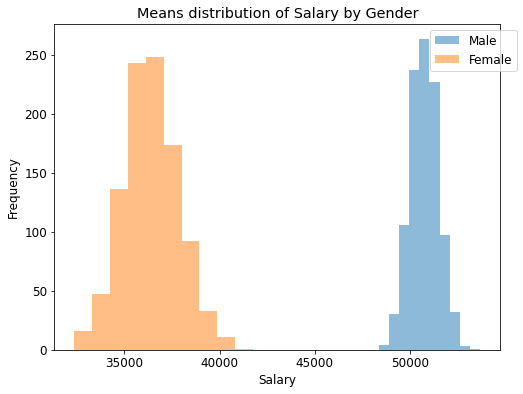

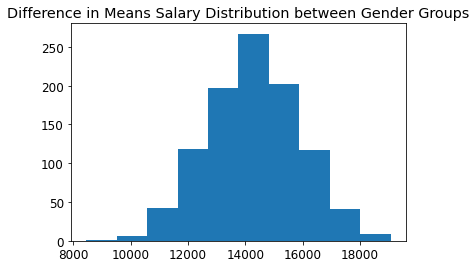

In [12]:
# bootstrapping different groups of gender from the original dataset
male_salary_means = my_bootstrap(male_dataset, 1000)
female_salary_means = my_bootstrap(female_dataset, 1000)

# visualizing the salary means for the two gender group
plt.figure(figsize=(8, 6))
plt.hist(male_salary_means, alpha=0.5, label='Male')
plt.hist(female_salary_means, alpha=0.5, label='Female')
plt.title('Means distribution of Salary by Gender')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.savefig('2-Means distribution of Salary by Gender', dpi=300, bbox_inches='tight')
plt.show()

# creating a dataframe to plot the difference in means
gender_diff_means = abs(male_salary_means - female_salary_means)

plt.hist(gender_diff_means)
plt.title('Difference in Means Salary Distribution between Gender Groups')
plt.savefig('2-Difference in Means Salary Distribution between Gender Groups', dpi=300, bbox_inches='tight')
plt.show()

According to Central Limit Theorem (CLT), the distribution of sample means is approximately normally distributed(as seen in the histogram above. Therfore we dont need to perform normality test for `male_salary_means` and `female_salary_means` distributions.

### Test for homogeneity of variance
Since the distributions for the two gender groups are normal, the homoscedasticity of the two distributions will be computed with Bartlett's test.

In [13]:
# using bartlett's to test for homogeneity of variance
stat, p = stats.bartlett(male_salary_means, female_salary_means)
print('Homoscedasticity Result: statistics:{}, p-value:{:.2e}'.format(stat, p))
if p < 0.05:
    print('The null hypothesis (H0) of equal variance is rejected.')
else:
    print('The null hypothesis (H0) of equal variance is accepted.')

Homoscedasticity Result: statistics:439.768427705079, p-value:1.22e-97
The null hypothesis (H0) of equal variance is rejected.


### Two-Sample Hypothesis Testing for the gender groups
$H_0: \mu_{male} = \mu_{female}$ The means salary of the two groups are equal.
<br> $H_a: \mu_{male}  \neq \mu_{female}$ The means salary of the two groups are not equal.

There's no homogeneity of variance between the two sample groups therefore we need to use the `Welch's Two-sample t-test` to check for differences in salary means for male and female gender.

In [14]:
# using the 'stats.ttest_ind' to compute the Welch's two-sample t-test
stat, p = stats.ttest_ind(male_salary_means, female_salary_means, equal_var=False)
print('T-test Result: statistics:{}, p-value:{:.2e}'.format(stat, p))
if p < 0.05:
    print('The alternative hypothesis (Ha) of different means salary for both gender is accepted')
else:
    print('The null hypothesis (H0) of equal means salary for both gender is accepted')

T-test Result: statistics:278.38823996301284, p-value:0.00e+00
The alternative hypothesis (Ha) of different means salary for both gender is accepted


The bootstrapped datasets provide convincing evidence that there is a statistically significant difference between the average annual salary for male and female in ML and DS Industry.

### QUESTION 3: ANOVA

Comparing the means of salary for three different levels of Academic degree (Bachelor's Degree, Master's Degree and Doctoral Degree).

In [15]:
# extracting different level of higher formal education

# doctoral group
doctoral_salary = cleaned_dataset[cleaned_dataset['formal_edu'] == 'doctoral']['salary']

# masters group
masters_salary = cleaned_dataset[cleaned_dataset['formal_edu'] == 'masters']['salary']

# bachelors group
bachelors_salary = cleaned_dataset[cleaned_dataset['formal_edu'] == 'bachelors']['salary']

print('Average means salary for Doctoral degree: {:.2f} \nAverage means salary for Masters degree: {:.2f} \nAverage means salary for Bachelors degree: {:.2f}'
      .format(doctoral_salary.mean(), masters_salary.mean(), bachelors_salary.mean()))

Average means salary for Doctoral degree: 68719.44 
Average means salary for Masters degree: 52120.11 
Average means salary for Bachelors degree: 35732.82


The level of formal education is a determinant factor for annual salary. The average salary for doctoral degree approximately doubles that of the bachelor's degree with average salary for master's degree in-between.

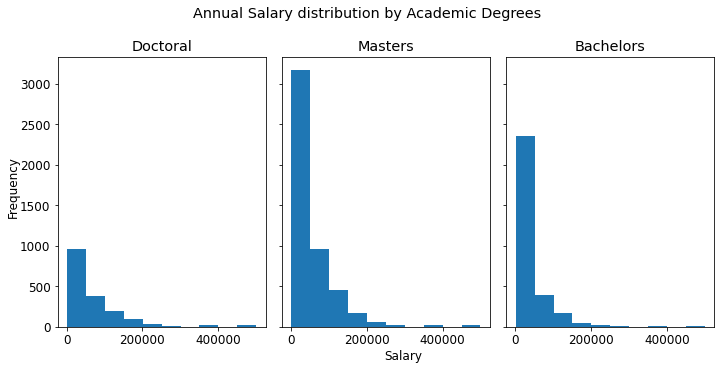

In [16]:
# visualizing salary distribution for the three groups
fig, axes = plt.subplots(1, 3, figsize=(10, 5), sharey=True, sharex=True)
fig.text(0.55, 0, 'Salary', ha='center', fontsize='12')
fig.text(0, 0.48, 'Frequency', va='center', rotation='vertical', fontsize='12')
axes[0].hist(doctoral_salary)
axes[1].hist(masters_salary)
axes[2].hist(bachelors_salary)
axes[0].set_title('Doctoral')
axes[1].set_title('Masters')
axes[2].set_title('Bachelors')
plt.suptitle('Annual Salary distribution by Academic Degrees')
plt.tight_layout()
plt.savefig('3-Annual Salary distribution by Academic Degrees', dpi=300, bbox_inches='tight')
plt.show()

From the histograms above, none of the distribution looks normal. Hence, we can't use Analysis of variance (ANOVA) for hypothesis testing to compare the means of salary for the three groups.

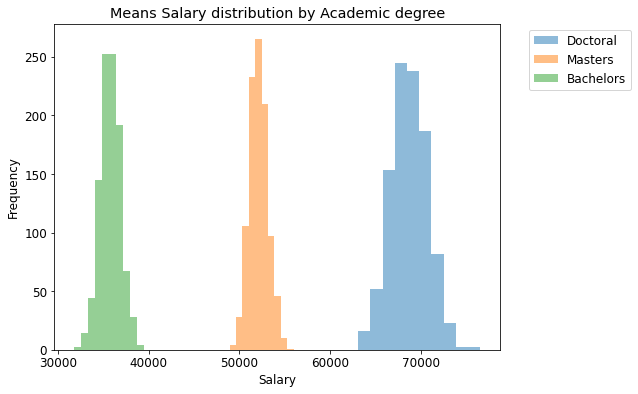

In [17]:
# bootstrapping the means of each formal education category with 'my_bootstrap' function

doctoral_salary_means = my_bootstrap(doctoral_salary, 1000)
masters_salary_means = my_bootstrap(masters_salary, 1000)
bachelors_salary_means = my_bootstrap(bachelors_salary, 1000)

# visualizing means salary distribution for different Academic degree
plt.figure(figsize=(8, 6))
plt.hist(doctoral_salary_means, alpha=0.5, label='Doctoral')
plt.hist(masters_salary_means, alpha=0.5, label='Masters')
plt.hist(bachelors_salary_means, alpha=0.5, label='Bachelors')
plt.title('Means Salary distribution by Academic degree') 
plt.legend(bbox_to_anchor=(1.05, 1))
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.savefig('3-Means Salary distribution by Academic degree', dpi=300, bbox_inches='tight')
plt.show()

According to Central Limit Theorem (CLT), the distribution of sample means is approximately normally distributed(as seen in the histograms for the three different groups; therefore, we can proceed to check for homogeneity of variance among the groups before performing the ANOVA test.

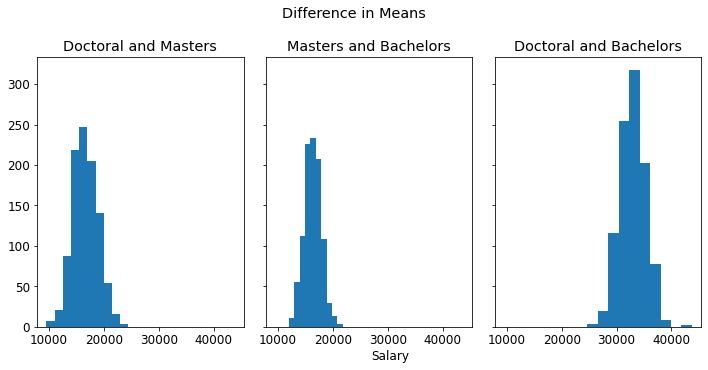

In [18]:
doc_mast_diff_means = abs(doctoral_salary_means - masters_salary_means)
mast_bach_diff_means = abs(masters_salary_means - bachelors_salary_means)
doc_bach_diff_means = abs(doctoral_salary_means - bachelors_salary_means)

# salary distribution for the three groups
fig, axes = plt.subplots(1, 3, figsize=(10, 5), sharey=True, sharex=True)

fig.text(0.55, 0, 'Salary', ha='center', fontsize='12')
axes[0].hist(doc_mast_diff_means, label='Doctoral')
axes[1].hist(mast_bach_diff_means, label='Masters')
axes[2].hist(doc_bach_diff_means, label='Bachelors')
axes[0].set_title('Doctoral and Masters')
axes[1].set_title('Masters and Bachelors')
axes[2].set_title('Doctoral and Bachelors')
plt.suptitle('Difference in Means')
plt.tight_layout()
plt.savefig('3-Difference in Means', dpi=300, bbox_inches='tight')
plt.show()

### Test for homogeneity of variances
Since the distributions for the three academic degree groups are normal, the test for equal variances among the three groups will be carried out with Bartlett's test.

In [19]:
# homoscedasticity with Barlett's test
stat, p = stats.bartlett(doctoral_salary_means, masters_salary_means, bachelors_salary_means)
print('Homoscedasticity Result: statistics:{}, p-value:{:.2e}'.format(stat, p))
if p < 0.05:
    print('The null hypothesis (H0) of equal variance among the groups is rejected.')
else:
    print('The null hypothesis (H0) of equal variance among the groups is accepted.')

Homoscedasticity Result: statistics:578.8399922454134, p-value:2.03e-126
The null hypothesis (H0) of equal variance among the groups is rejected.


Since there's no homogenetiy of variances among the three groups and our test involves a single independent factor(three levels of formal education) and a dependent variable(the means salary), a `Welch's one-way ANOVA test` will be suitable for test of equality of means.

## ANOVA Hypothesis Testing for different levels of formal education
$H_0: \mu_{doctoral} = \mu_{masters} = \mu_{bachelors}$ The means salary of the three groups are equal.
<br>$H_a: \mu_{doctoral} \neq \mu_{masters} \neq \mu_{bachelors} $ The means salary of the three groups are different.


In [20]:
# preparing the dataset for Welch's ANOVA Test
doctoral_df = pd.DataFrame(doctoral_salary_means)
doctoral_df['degree'] = 'doctoral'

masters_df = pd.DataFrame(masters_salary_means)
masters_df['degree'] = 'masters'

bachelors_df = pd.DataFrame(bachelors_salary_means)
bachelors_df['degree'] = 'bachelors'

doc_mast_bach = (pd.concat([doctoral_df, masters_df, bachelors_df], ignore_index=True)
                 .rename(columns={0:'salary_means'}))

# performing the Welch's ANOVA Test
aov = welch_anova(data=doc_mast_bach, dv='salary_means', between='degree')
stat = aov['F'].values[0]
p = aov['p-unc'].values[0]

print('Welch\'s ANOVA Result: F:{}, p-value:{:.2e}'.format(stat, p))
if p < 0.05:
    print('The alternative hypothesis (Ha) of different means salary for the three groups is accepted.')
else:
    print('The null hypothesis (H0) of equal means salary for the three groups is accepted.')

Welch's ANOVA Result: F:121196.4726837031, p-value:0.00e+00
The alternative hypothesis (Ha) of different means salary for the three groups is accepted.


The bootstrapped datasets provide convincing evidence that there is a statistically significant difference between the average annual salary for Doctoral, Masters and Bachelors level of formal education in ML and DS Industry.

### Conclusion
In Machine Learning and Data Science industry, women are under-represented and the average annual income for men is more than that of women. Also, different levels of formal education affect annual income. Doctoral degree holders earn higher annual salary compared to Master's and Bachelor's degree holder. Practitioners with Bachelor's degree earn the least annual salary.